In [29]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
 
plt.style.use('fivethirtyeight')
import numpy as np
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

In [67]:
sales_train = pd.read_csv("../data/sales_train.csv")

In [68]:
sales_train.shape

(2935849, 6)

In [69]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [70]:
# removing the Null values or -VE values
sales_train.drop(sales_train[(sales_train['item_cnt_day']<=0)|(sales_train['item_price']<=0)].index ,axis=0,inplace=True)

In [73]:
sales_train['date']=pd.to_datetime(sales_train['date'],dayfirst=True)

In [71]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [116]:
# extracting month and year seperately
sales_train['month_year'] = sales_train['date'].dt.to_period('M').map(str)

In [114]:
# sales_train['year'] = sales_train['date'].dt.year
# sales_train['month'] = sales_train['date'].dt.month

In [117]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month_year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01
5,2013-01-10,0,25,2564,349.00,1.0,2013-01


In [118]:
new_data = sales_train.groupby(['month_year'])["item_cnt_day"].sum()

In [119]:
new_data = sales_train[['month_year','item_cnt_day']]

In [120]:
new_data.head()

,month_year,item_cnt_day
0,2013-01,1.0
1,2013-01,1.0
3,2013-01,1.0
4,2013-01,1.0
5,2013-01,1.0


In [121]:
processed_data = sales_train.groupby(['month_year'])["item_cnt_day"].sum()

In [125]:
len(processed_data)

34

In [129]:
[{processed_data[data],data} for data in processed_data.index]

[{131850.0, '2013-01'},
 {128382.0, '2013-02'},
 {147438.0, '2013-03'},
 {107439.0, '2013-04'},
 {107147.0, '2013-05'},
 {125583.0, '2013-06'},
 {117165.0, '2013-07'},
 {125586.0, '2013-08'},
 {133551.0, '2013-09'},
 {127815.0, '2013-10'},
 {130270.0, '2013-11'},
 {183670.0, '2013-12'},
 {117243.0, '2014-01'},
 {109975.0, '2014-02'},
 {115501.0, '2014-03'},
 {'2014-04', 96744.0},
 {'2014-05', 97938.0},
 {'2014-06', 97623.0},
 {'2014-07', 91505.0},
 {102910.0, '2014-08'},
 {'2014-09', 99427.0},
 {107623.0, '2014-10'},
 {118050.0, '2014-11'},
 {169055.0, '2014-12'},
 {111299.0, '2015-01'},
 {'2015-02', 84419.0},
 {'2015-03', 82233.0},
 {'2015-04', 77948.0},
 {'2015-05', 72435.0},
 {'2015-06', 64237.0},
 {'2015-07', 63316.0},
 {'2015-08', 66196.0},
 {'2015-09', 72989.0},
 {'2015-10', 71184.0}]

In [130]:
df = pd.DataFrame([data for data in processed_data], index =[processed_data.index], columns={'item_cnt_month'})

In [131]:
df.head()

,item_cnt_month
month_year,
2013-01,131850.0
2013-02,128382.0
2013-03,147438.0
2013-04,107439.0
2013-05,107147.0


In [132]:
df.head()

,item_cnt_month
month_year,
2013-01,131850.0
2013-02,128382.0
2013-03,147438.0
2013-04,107439.0
2013-05,107147.0


In [133]:
y = df

In [134]:
y.reset_index(inplace = True)

In [135]:
y.head()

,month_year,item_cnt_month
0,2013-01,131850.0
1,2013-02,128382.0
2,2013-03,147438.0
3,2013-04,107439.0
4,2013-05,107147.0


In [136]:
y = df #.set_index('month_year')

In [137]:
y['month_year'] = pd.to_datetime(y['month_year'], format = '%Y-%m')

In [142]:
y.head()

,month_year,item_cnt_month
0,2013-01-01,131850.0
1,2013-02-01,128382.0
2,2013-03-01,147438.0
3,2013-04-01,107439.0
4,2013-05-01,107147.0


In [143]:
y = df.set_index('month_year')

<AxesSubplot:xlabel='month_year'>

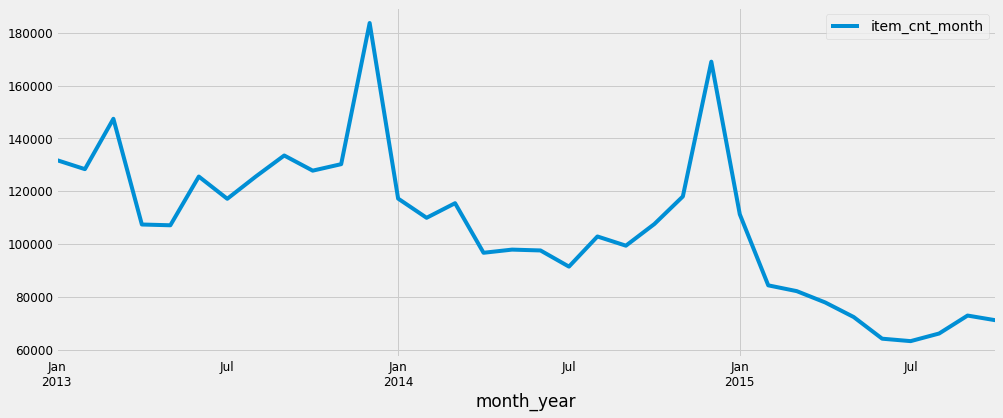

In [144]:
y.plot(figsize=(15, 6))

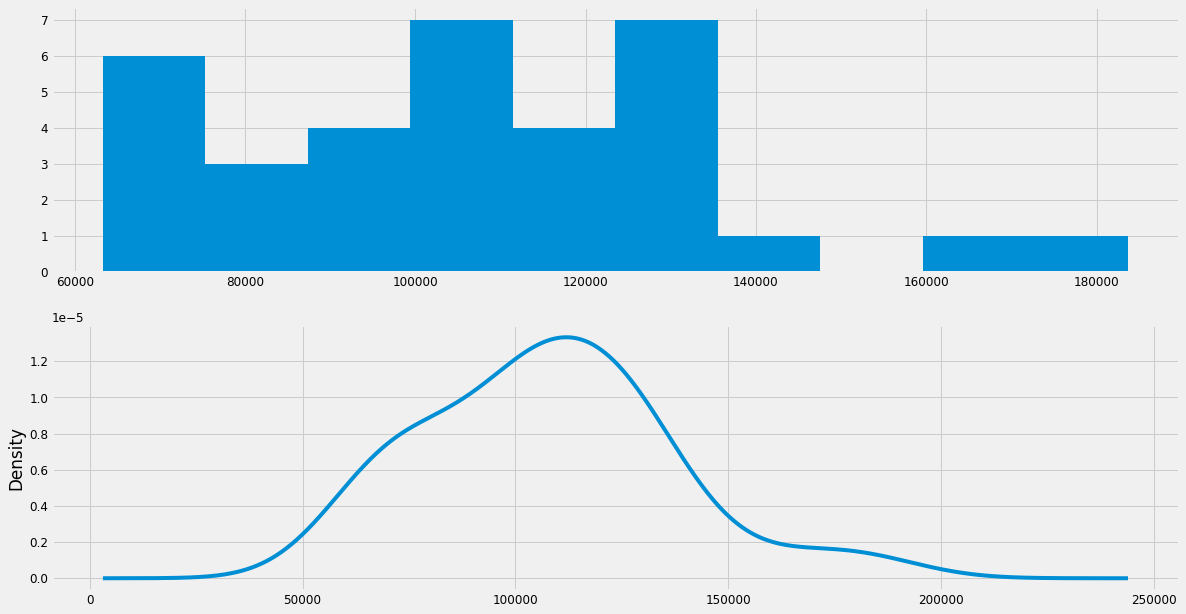

In [145]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y.item_cnt_month.hist()
pyplot.subplot(212)
y.item_cnt_month.plot(kind='kde')
pyplot.show()

In [87]:
y.dropna(how='all',inplace=True)

In [89]:
y.isnull().values.any()

False

<AxesSubplot:xlabel='month_year', ylabel='item_cnt_month'>

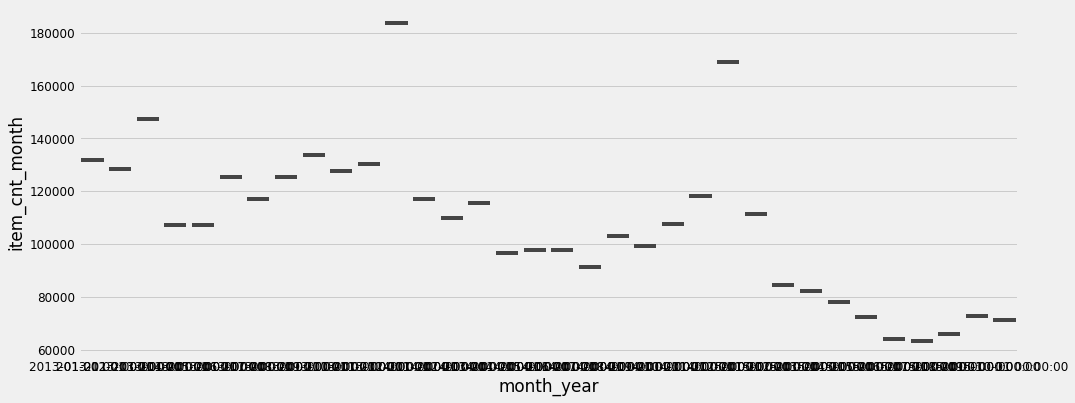

In [149]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.item_cnt_month.index, y.item_cnt_month, ax=ax)

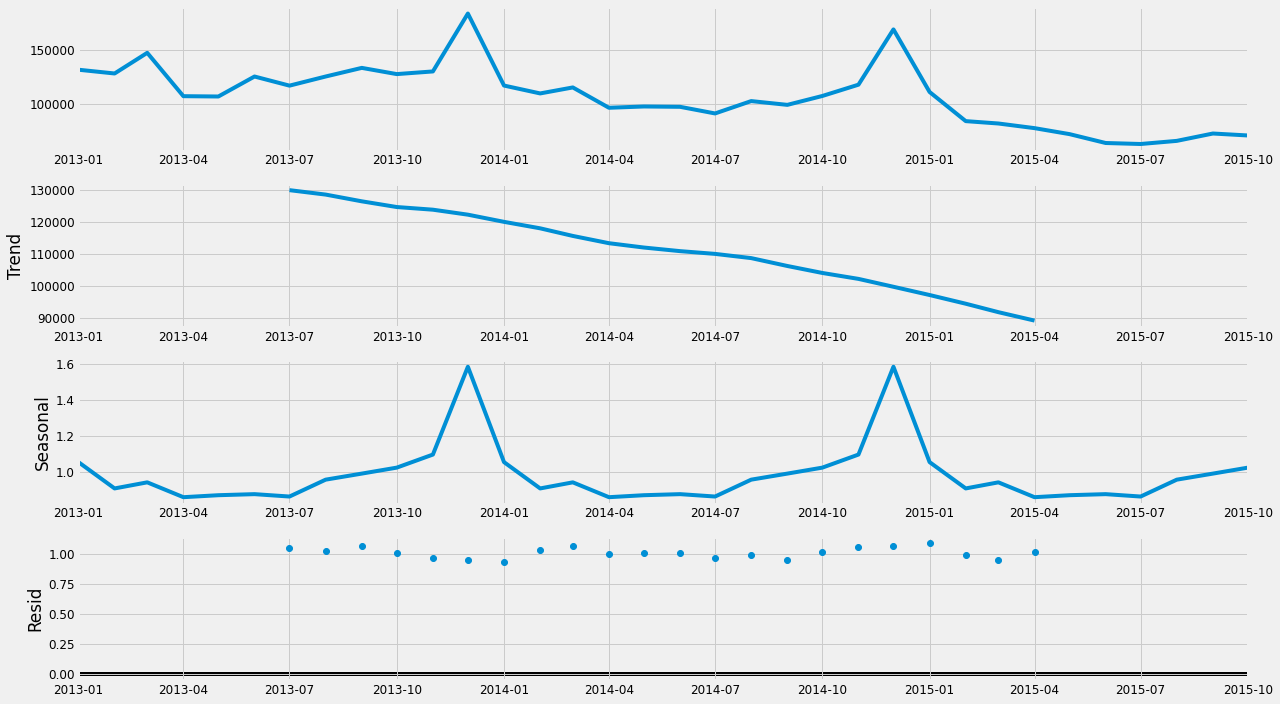

In [147]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [148]:
# by looking at the data there is a -ve trend
# there is a seasonality in the data

In [152]:
# We can check stationary using the followin:
# ACF and PACF plots:If the TS is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points
# Plotting Rolling Statistics:We can plot the moving average or moving variance ans see if it varies with time. Moving average/variance is for any instant 't', the average/variance of the last year. i.e last 12 months
# Augmented Dickey-Fuller Test: This is one of the stastical tests for checking stationary. here the null hypothesis is that the TS is non-stationary. The test results comprise of a test Statistics ans some Critical Values for difference confidence levels. If the 'Test Statistic' is less than the 'Critical Value', we can reject the null hypothesis and say that the series is stationary. Refer the article for details

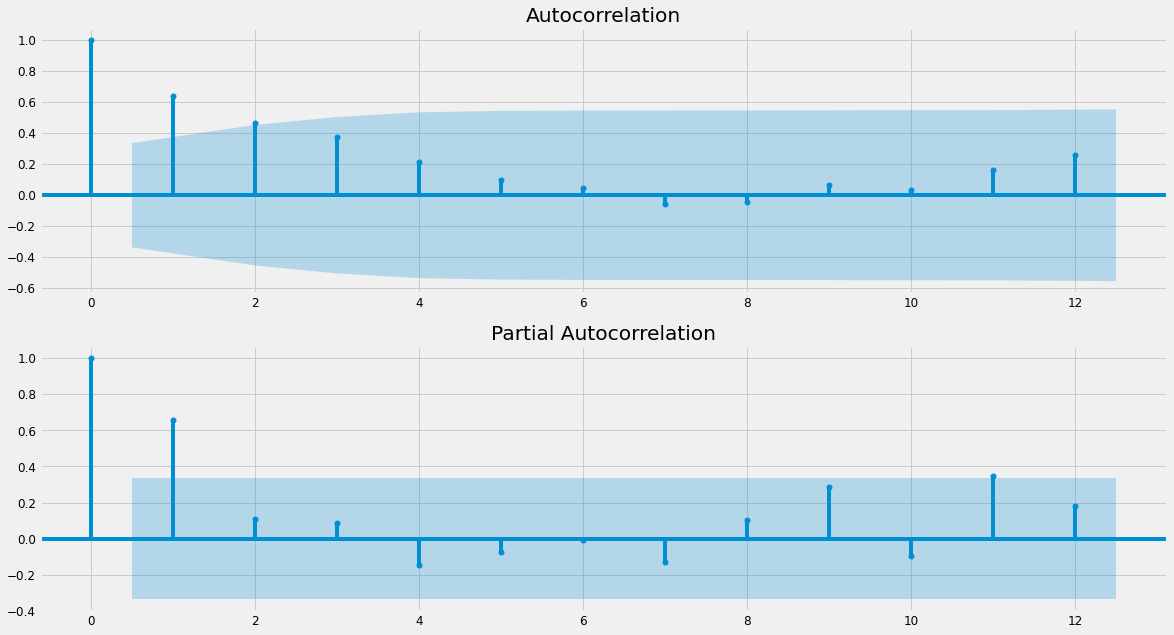

In [158]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.item_cnt_month, ax=pyplot.gca(), lags = 12)
pyplot.subplot(212)
plot_pacf(y.item_cnt_month, ax=pyplot.gca(), lags = 12)
pyplot.show()

In [156]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()#window=12, because of yearly trend for both mean and variance
#Plot rolling statistics:
    plt.figure(figsize=(15,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

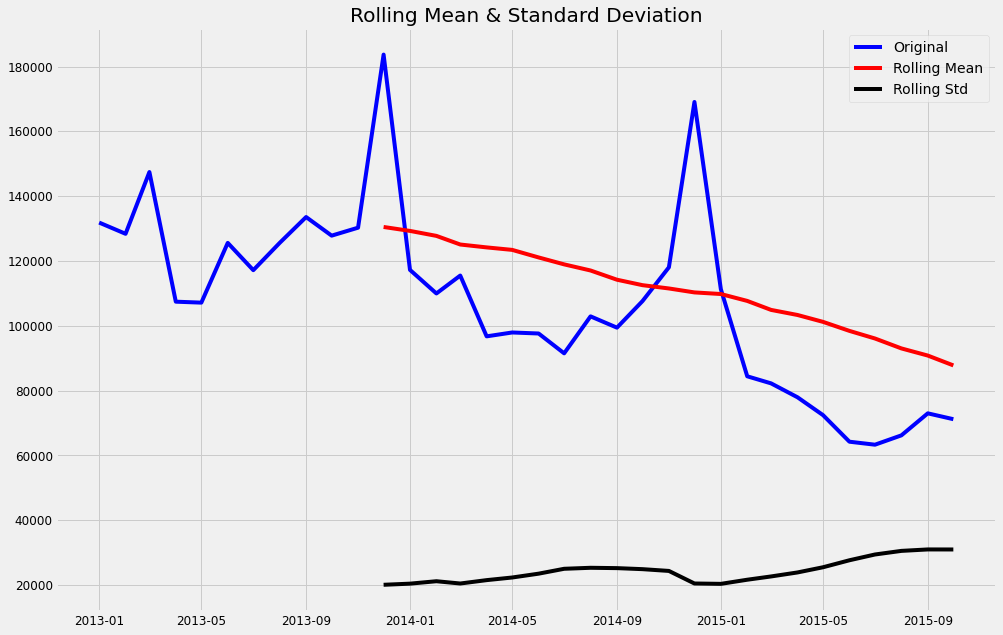

Results of Dickey-Fuller Test:
Test Statistic                 -2.392387
p-value                         0.143897
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [157]:
test_stationarity(y)

In [ ]:
# as p - value is greater than 0.05 as a result we Fail to reject Null hypothesis

In [ ]:
# Making Time Series Stationary
# There are 2 major reasons behind non-stationary of a TS:

# Trend - varying mean over time 
# Seasonality - variations at specific time-frame. 

In [ ]:
# Transformations
# We can apply transformation which prnalize higher values more than smaller values. These can be taking a log, square root, cube root, etc Lets take a log Transformation here for simplicity

#### LogScale Transformation

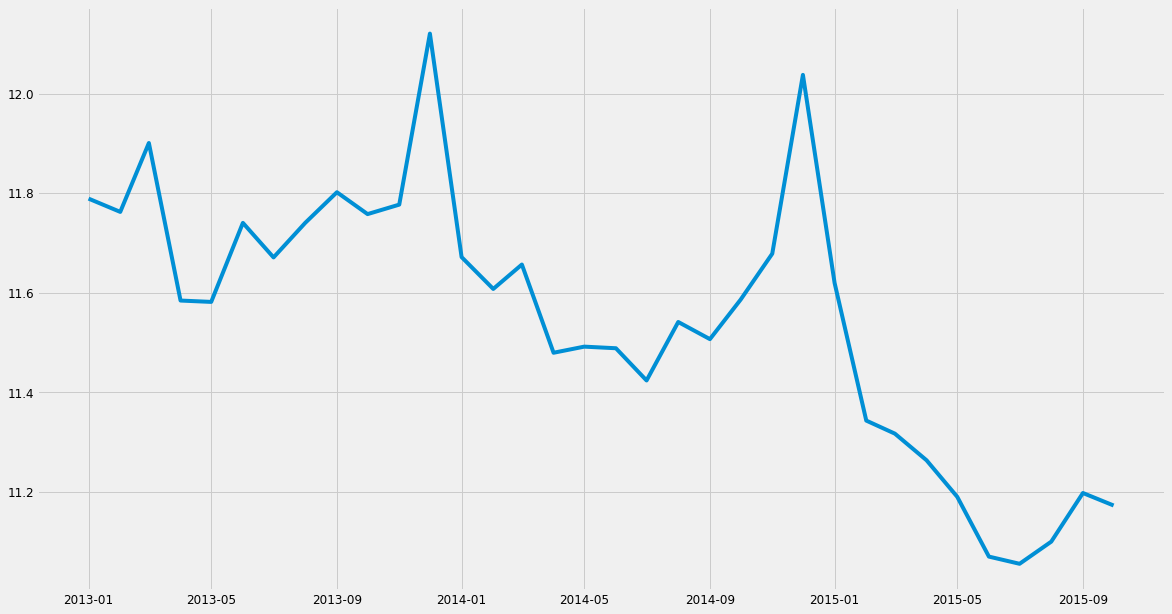

In [159]:
ts_log = np.log(y)
plt.plot(ts_log)

In [ ]:
# Techniques to remove Trend - Smoothing
# Smoothing is taking rolling averages over windows of time

In [ ]:
# Moving average
# we take average of 'k' consecutive values depending on the frequency of time sereis
# Here we can take the average over the past 1 year i.e last 12 (months)values
# A drawbackin this particular approach is that the time-period has to be strictly defined

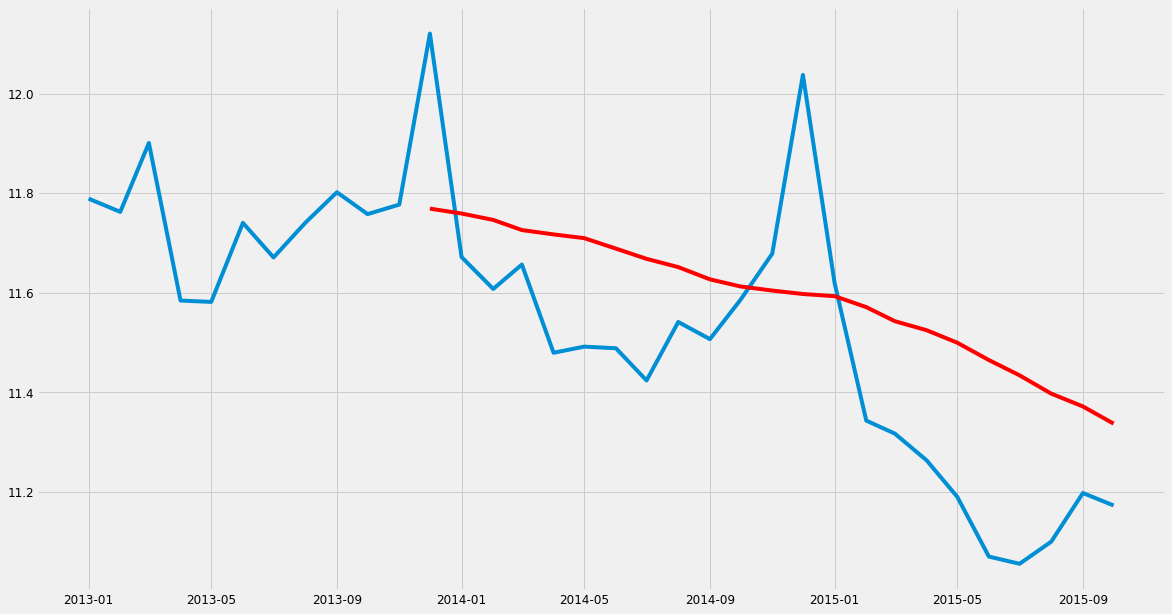

In [160]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [162]:
ts_log_moving_avg_diff = ts_log.item_cnt_month - moving_avg.item_cnt_month
ts_log_moving_avg_diff.head(12)

month_year
2013-01-01         NaN
2013-02-01         NaN
2013-03-01         NaN
2013-04-01         NaN
2013-05-01         NaN
2013-06-01         NaN
2013-07-01         NaN
2013-08-01         NaN
2013-09-01         NaN
2013-10-01         NaN
2013-11-01         NaN
2013-12-01    0.351594
Name: item_cnt_month, dtype: float64

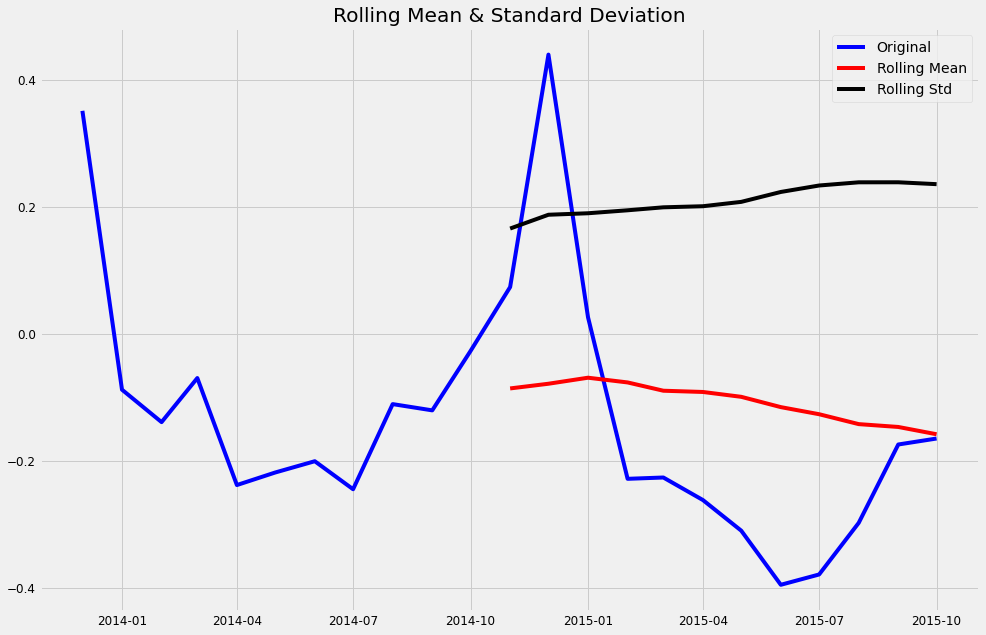

Results of Dickey-Fuller Test:
Test Statistic                 -3.202639
p-value                         0.019832
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [164]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

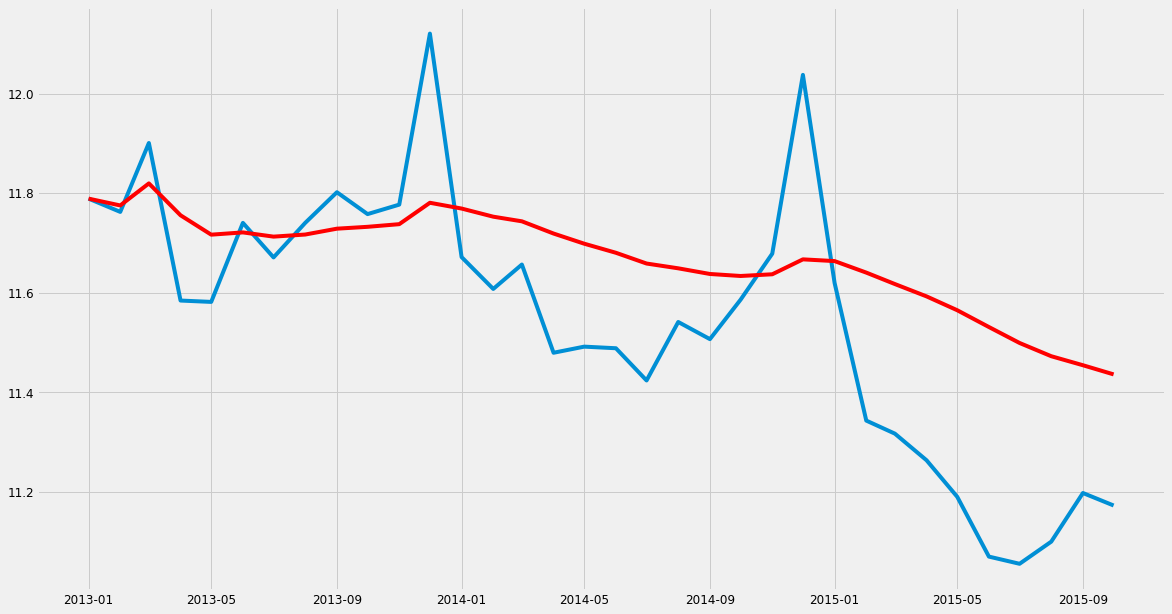

In [165]:
expwighted_avg =  ts_log.ewm(halflife=12).mean()
# pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

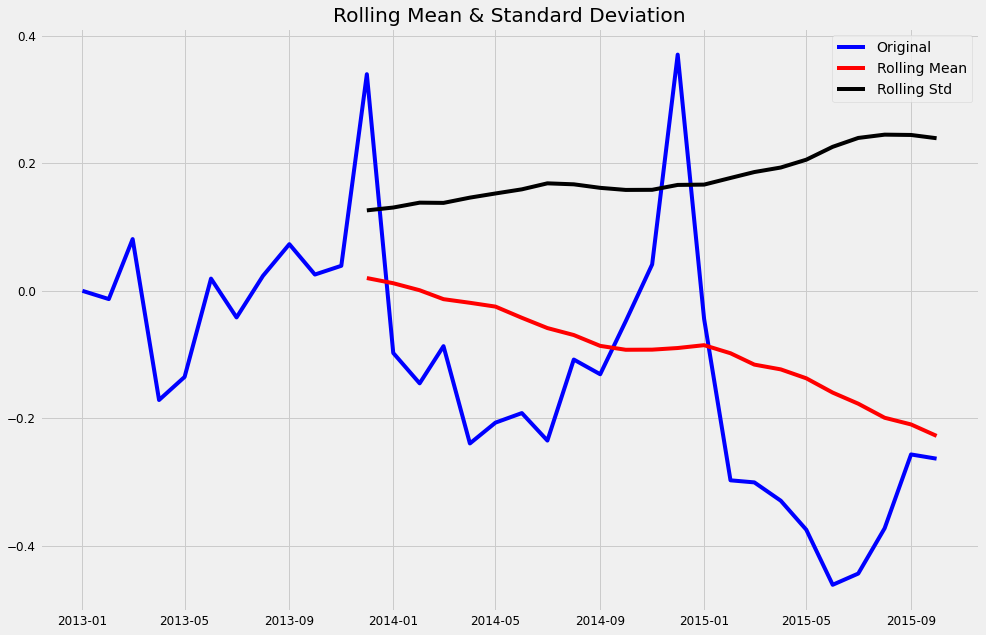

Results of Dickey-Fuller Test:
Test Statistic                 -2.504917
p-value                         0.114283
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [166]:
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)

In [ ]:
# Future Techniques to remove Seasonality and Trend
# The simple trend reduction techniques discussed before dont work in all cases, particularly the ones with high seasonality
# Differencing
# In this technique, we take the difference of the observation at a particular instant with that at the previous instant
# First oreder differencing in Pandas

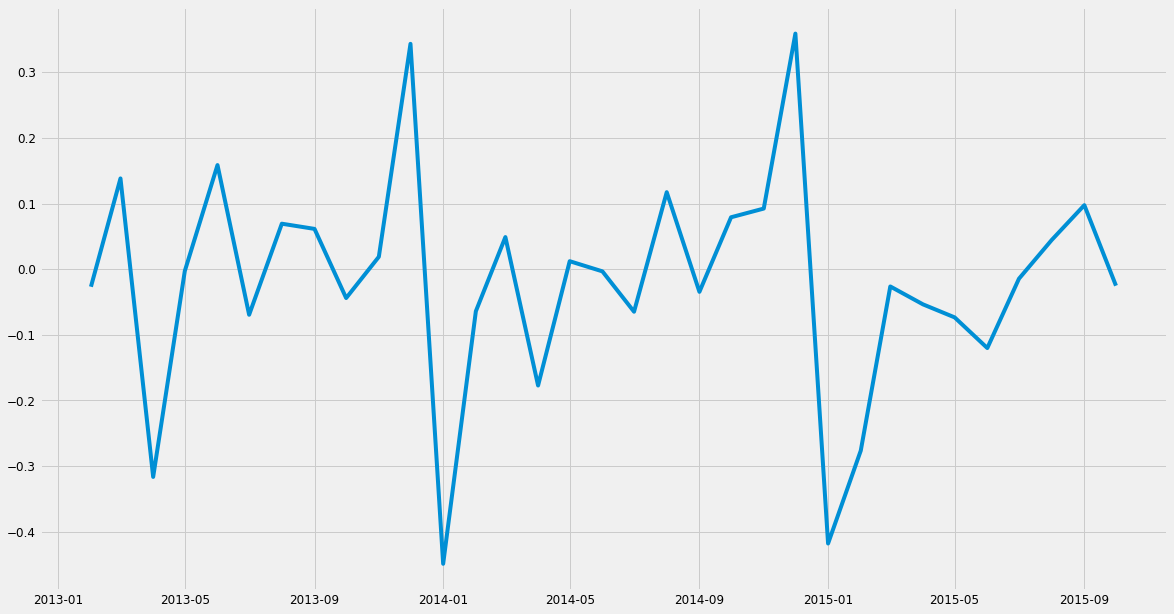

In [167]:
ts_log_diff = ts_log.item_cnt_month - ts_log.item_cnt_month.shift()
plt.plot(ts_log_diff)

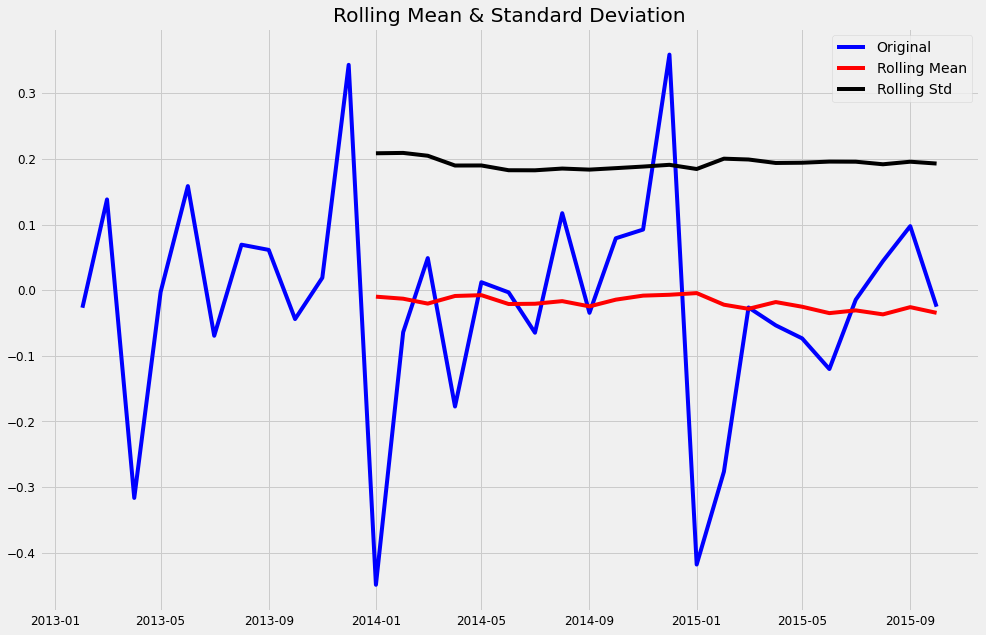

Results of Dickey-Fuller Test:
Test Statistic                -6.968484e+00
p-value                        8.788707e-10
#Lags Used                     1.000000e+01
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


In [168]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
# Decomposition
# IN this approach, both trend and seasonality are modeled seoerately and the remaining part of the series is returned

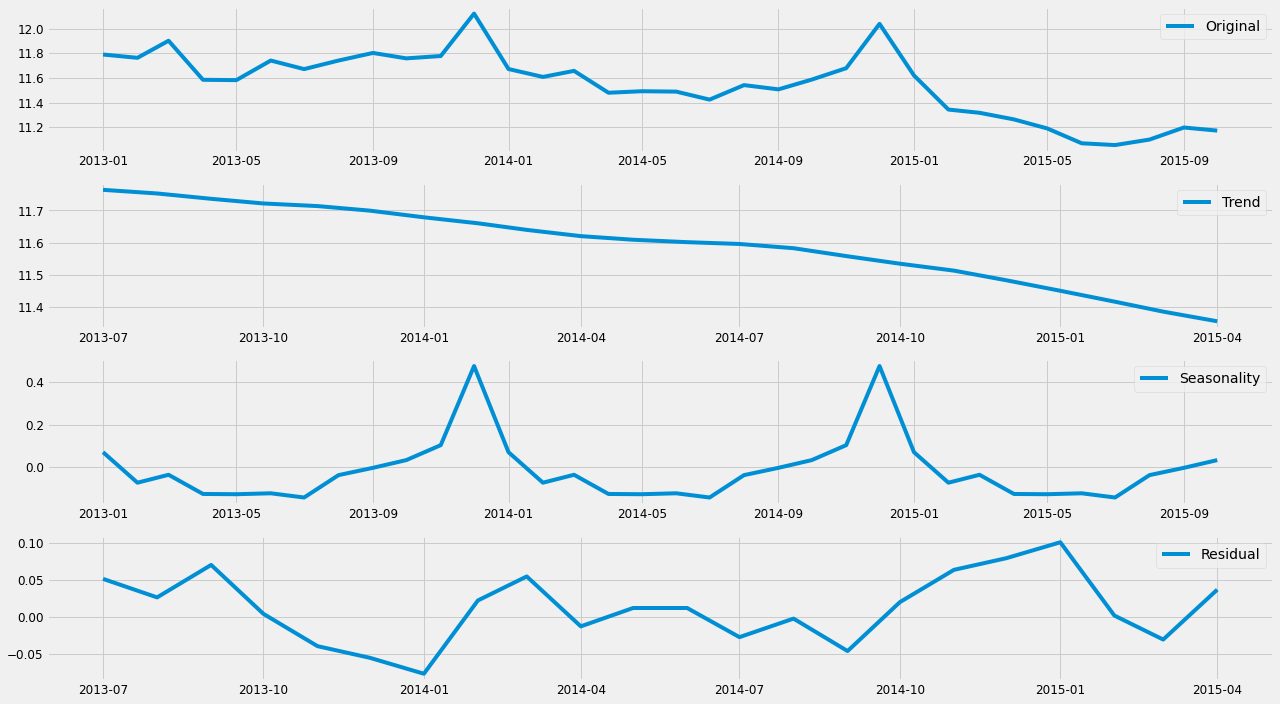

In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

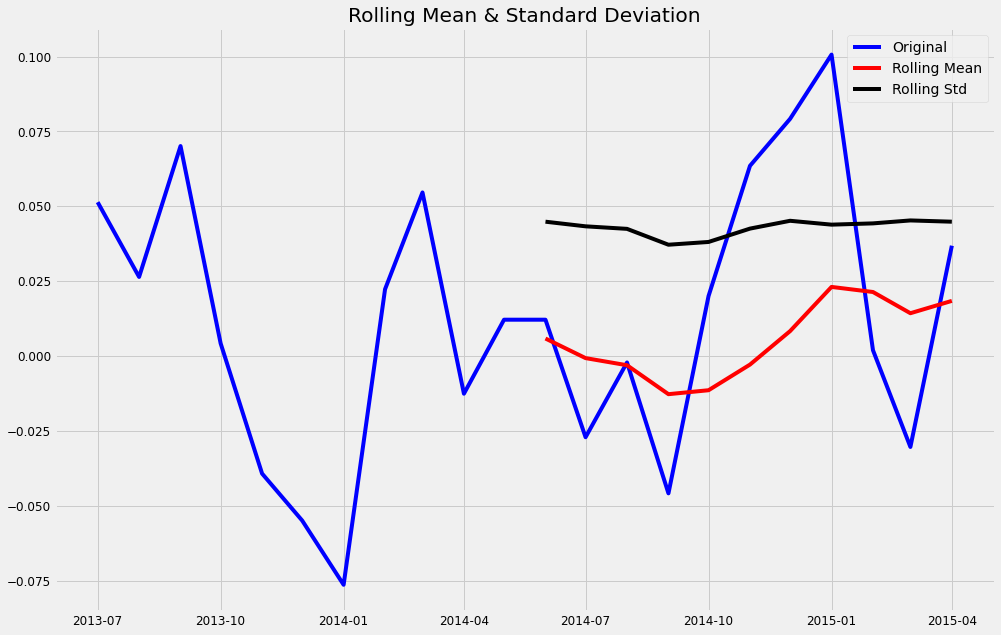

Results of Dickey-Fuller Test:
Test Statistic                 -2.854745
p-value                         0.050869
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [170]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### Tuned SARIMA

In [172]:
import itertools

In [175]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [ (x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print(f'SARIMAX: {pdq[1]} x {seasonal_pdq[1]}')
print(f'SARIMAX: {pdq[1]} x {seasonal_pdq[2]}')
print(f'SARIMAX: {pdq[2]} x {seasonal_pdq[3]}')
print(f'SARIMAX: {pdq[2]} x {seasonal_pdq[4]}')

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 1, 0, 6)
SARIMAX: (0, 1, 0) x (0, 1, 1, 6)
SARIMAX: (0, 1, 0) x (1, 0, 0, 6)


In [179]:
min_aic = 999999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
#         try:
            mod = sm.tsa.statespace.SARIMAX(
                                            train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationary=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(f'ARIMAX{param}x{param_seasonal}12 - AIC:{results.aic}')
            
            if results.aic < min_aic:
                min_aic = results.aic
                min_aic_model = results
#         except:
#             continue

NameError: name 'train' is not defined

In [177]:
min_aic_model.summary()

NameError: name 'min_aic_model' is not defined

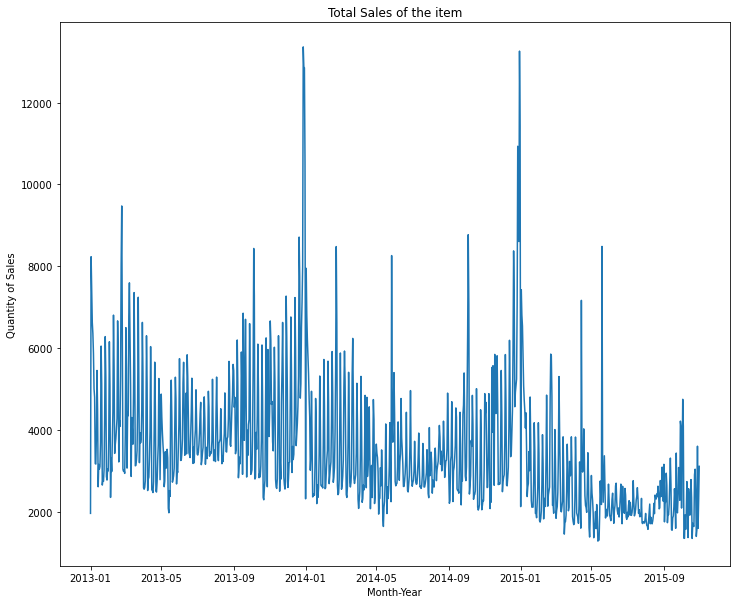

In [56]:
data=sales_train.groupby(["date","date_block_num","shop_id","item_id"])["item_cnt_day"].sum().reset_index()
ts=data.groupby(['date'])['item_cnt_day'].sum()
ts.astype('float')
plt.figure(figsize=(12,10))
plt.title('Total Sales of the item')
plt.xlabel('Month-Year')
plt.ylabel('Quantity of Sales')
plt.plot(ts)

In [30]:
ts.head()

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
Name: item_cnt_day, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()#window=12, because of yearly trend for both mean and variance
#Plot rolling statistics:
    plt.figure(figsize=(15,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

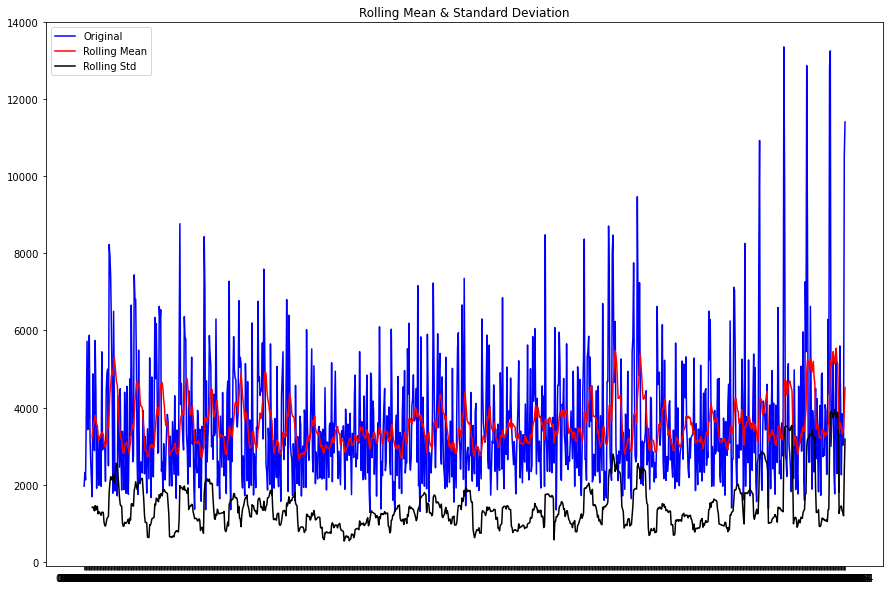

Results of Dickey-Fuller Test:
Test Statistic                -9.420360e+00
p-value                        5.524347e-16
#Lags Used                     2.200000e+01
Number of Observations Used    1.011000e+03
Critical Value (1%)           -3.436835e+00
Critical Value (5%)           -2.864403e+00
Critical Value (10%)          -2.568294e+00
dtype: float64


In [13]:
test_stationarity(ts)

In [14]:
ts_data = pd.DataFrame(ts)

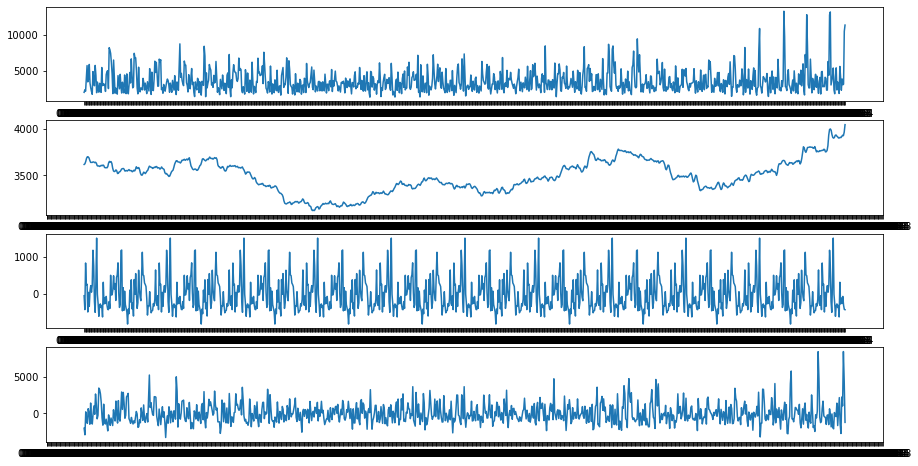

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_data,period=100)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(ts,label='Orginial')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.subplot(414)
plt.plot(residual,label='Residual')

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


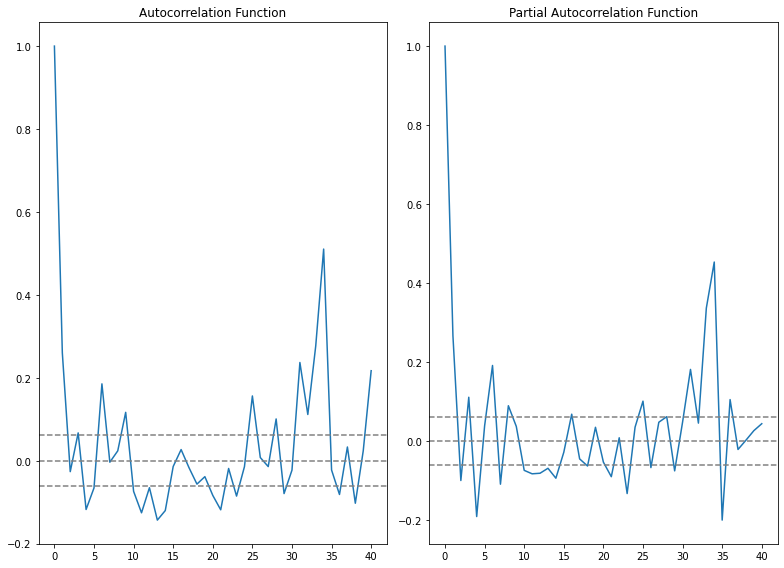

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(ts,fft=False)
lag_pacf=pacf(ts,method='ols')
plt.figure(figsize=(11,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

AttributeError: 'Series' object has no attribute 'item_cnt_day'

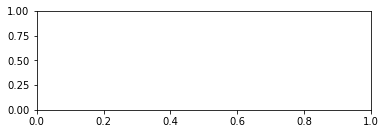

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has bee

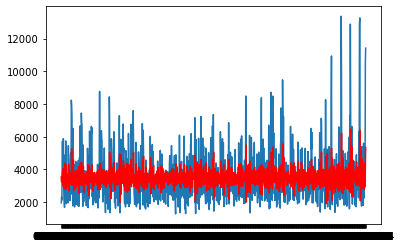

In [20]:
model=ARIMA(ts,order=(2,0,2))
result = model.fit(disp=-1)
plt.plot(ts,label="Original")
plt.plot(result.fittedvalues,color='red',label="Predicted")

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has bee

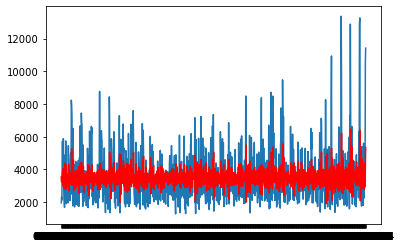

In [21]:
model=ARIMA(ts,order=(2,0,2))
result = model.fit(disp=-1)
plt.plot(ts,label="Original")
plt.plot(result.fittedvalues,color='red',label="Predicted")

In [22]:
forecast_errors = [ts[i]-result.fittedvalues[i] for i in range(len(ts))]
bias = sum(forecast_errors) * 1.0/len(ts)
print('Bias: %f' % bias)
test=pd.read_csv("../data/test.csv")
predictions = pd.DataFrame(result.fittedvalues).reset_index()
predictions.columns=["date","predictions"]
predictions.head()# Monthly sales forecasting

Bias: 0.057976


,date,predictions
0,01.01.2013,3535.368752
1,01.01.2014,3235.290105
2,01.01.2015,3577.863402
3,01.02.2013,3227.478393
4,01.02.2014,3862.078216


In [23]:
predictions.to_csv("../data/ARIMApredictions.csv",index=False)

In [24]:
sample_submission = pd.read_csv("../data/sample_submission.csv")
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [25]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [150]:
test=pd.read_csv("../data/test.csv")

In [151]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
